In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cmocean
import cartopy.feature as cfeature
from scipy.stats import linregress

# Data from: https://www.bco-dmo.org/dataset/773466#data-files

bleaching_df=pd.read_csv(r"global_bleaching_environmental.csv")
#display(bleaching_df)

#deleting 'nd' in data set and changing them to NaN
# got error that says: "ValueError: could not convert string to float: 'nd'"-need to change nd to Nan values, should only need to do this once
bleaching_df['Percent_Bleaching'].loc[bleaching_df['Percent_Bleaching']=='nd']=np.nan
bleaching_df['Temperature_Kelvin'].loc[bleaching_df['Temperature_Kelvin']=='nd']=np.nan

#make sure data is in float format
bleaching_df['Percent_Bleaching'].astype(float)
bleaching_df['Temperature_Kelvin'].astype(float)

/tmp/ipykernel_82/2702383563.py:11: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  bleaching_df=pd.read_csv(r"global_bleaching_environmental.csv")
/tmp/ipykernel_82/2702383563.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bleaching_df['Percent_Bleaching'].loc[bleaching_df['Percent_Bleaching']=='nd']=np.nan
/tmp/ipykernel_82/2702383563.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bleaching_df['Temperature_Kelvin'].loc[bleaching_df['Temperature_Kelvin']=='nd']=np.nan


0        302.05
1        303.30
2        299.18
3        299.61
4        299.70
          ...  
41356    301.85
41357    302.51
41358    302.51
41359    301.07
41360    301.07
Name: Temperature_Kelvin, Length: 41361, dtype: float64

/tmp/ipykernel_82/3539924433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat.loc[lat=='nd']=np.nan
/tmp/ipykernel_82/3539924433.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1980 ['Percent_Bleaching']=data1980 ['Percent_Bleaching'].astype(float)


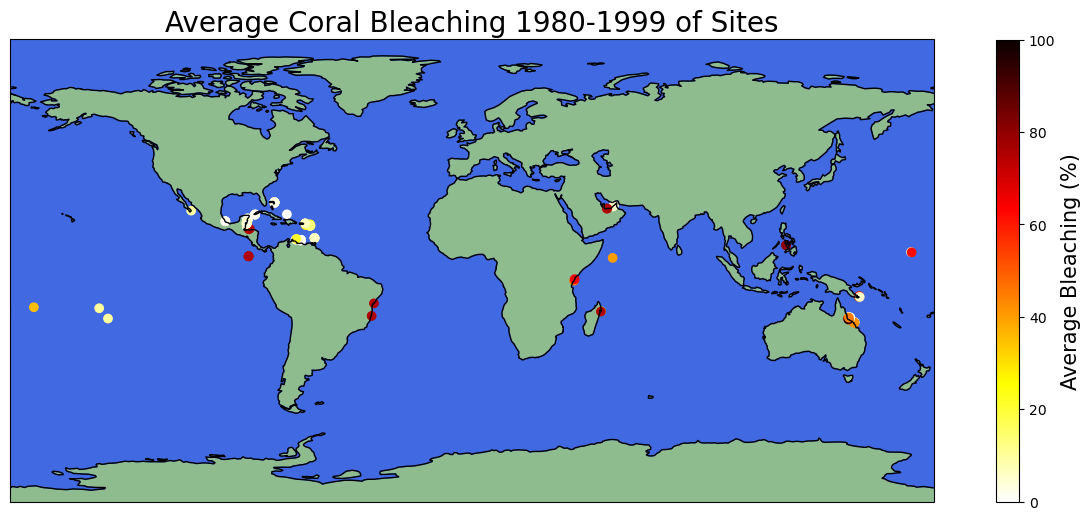

In [2]:
# Bleaching percent average for years 1980-1999

# got error that says: "ValueError: could not convert string to float: 'nd'"-need to change nd to Nan values, should only need to do this once
lat=bleaching_df['Latitude_Degrees']
lat.loc[lat=='nd']=np.nan

bleaching1980to1999 = bleaching_df.loc[bleaching_df['Date_Year'] <2000]
# compling data data from the years 1980-1999
data1980 = bleaching1980to1999[['Latitude_Degrees', 'Longitude_Degrees', 'Percent_Bleaching', 'Site_Name']]
# making a seperatre varible that has all of data from the varibles listed only from the years 1980-1999
data1980 ['Percent_Bleaching']=data1980 ['Percent_Bleaching'].astype(float)
# have to change the data from being strs to floats 
percentaverage1980to1999 = data1980.groupby(['Site_Name']).mean()
# when the site name is the same, I am telling it to take the mean of those samples 
percentaverage1980to1999 = percentaverage1980to1999.reset_index()
# resetting the data to original format from the big data set 
lat80 = percentaverage1980to1999['Latitude_Degrees']
lon80 = percentaverage1980to1999['Longitude_Degrees']

Average_bleaching1980to1999 = plt.figure(figsize=(16, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
# made map bigger, was zoomed in before
plt.title('Average Coral Bleaching 1980-1999 of Sites', fontsize=20)
ax.coastlines(resolution = '110m', color='black')
#add land feature and color
ax.add_feature(cfeature.LAND, color='darkseagreen')
ax.add_feature(cfeature.OCEAN, color='royalblue')


plt.scatter(lon80, lat80, c=percentaverage1980to1999['Percent_Bleaching'], transform=ccrs.PlateCarree(), cmap='hot_r',vmin=0, vmax=100)
# chose a perceptually uniform squential color map
cbar = plt.colorbar(label="Average Bleaching (%)", orientation="vertical") 
cbar.set_label('Average Bleaching (%)',size=15)
#got the code to change the font size to 15 from stack over flow
# could also use plasma as a color bar option
plt.show()
Average_bleaching1980to1999.savefig('Average_bleaching1980to1999.png')

/tmp/ipykernel_82/2065547825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2000 ['Percent_Bleaching']=data2000 ['Percent_Bleaching'].astype(float)


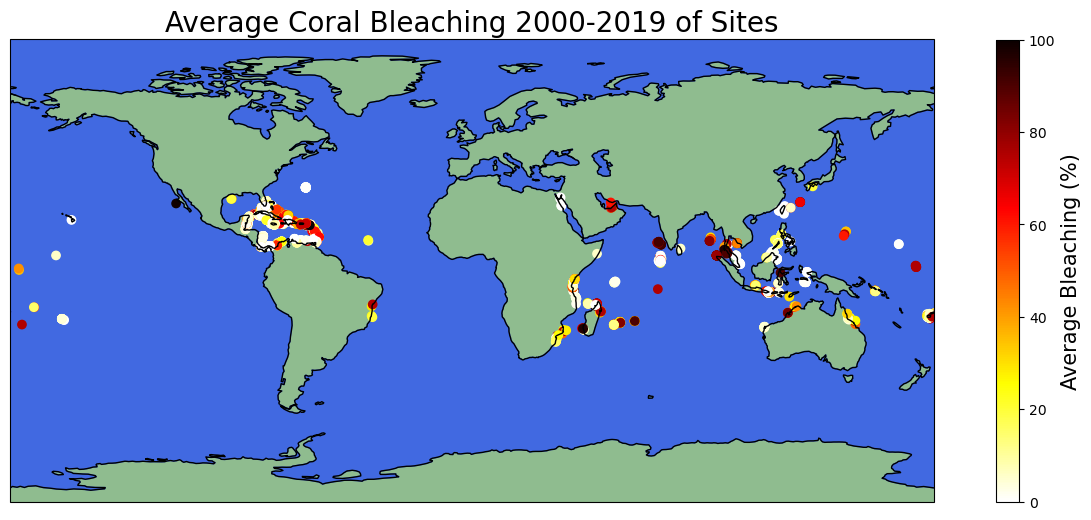

In [3]:
# Bleaching percent average for years 2000-2019
bleaching2000to2019 = bleaching_df.loc[bleaching_df['Date_Year'] >=2000]
# compling data data from the years 2000-2019
data2000 = bleaching2000to2019[['Latitude_Degrees', 'Longitude_Degrees', 'Percent_Bleaching', 'Site_Name']]
# making a seperatre varible that has all of data from the varibles listed only from the years 2000-2019
data2000 ['Percent_Bleaching']=data2000 ['Percent_Bleaching'].astype(float)
# have to change the data from being strs to floats 
percentaverage2000to2019 = data2000.groupby(['Site_Name']).mean()
# when the site name is the same, I am telling it to take the mean of those samples 
percentaverage2000to2019 = percentaverage2000to2019.reset_index()
# resetting the data to original format from the big data set 
lat00 = percentaverage2000to2019['Latitude_Degrees']
lon00 = percentaverage2000to2019['Longitude_Degrees']

Average_bleaching2000to2019 = plt.figure(figsize=(16, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
plt.title('Average Coral Bleaching 2000-2019 of Sites', fontsize=20)
ax.coastlines(resolution = '110m', color='black')
#add land feature and color
ax.add_feature(cfeature.LAND, color='darkseagreen')
ax.add_feature(cfeature.OCEAN, color='royalblue')


plt.scatter(lon00, lat00, c=percentaverage2000to2019['Percent_Bleaching'], transform=ccrs.PlateCarree(), cmap='hot_r')
cbar = plt.colorbar(label="Average Bleaching (%)", orientation="vertical") 
cbar.set_label('Average Bleaching (%)',size=15)
plt.show()
Average_bleaching2000to2019.savefig('Average_bleaching2000to2019.png')

/tmp/ipykernel_82/3766521507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata1980 ['Temperature_Kelvin']=tempdata1980 ['Temperature_Kelvin'].astype(float)


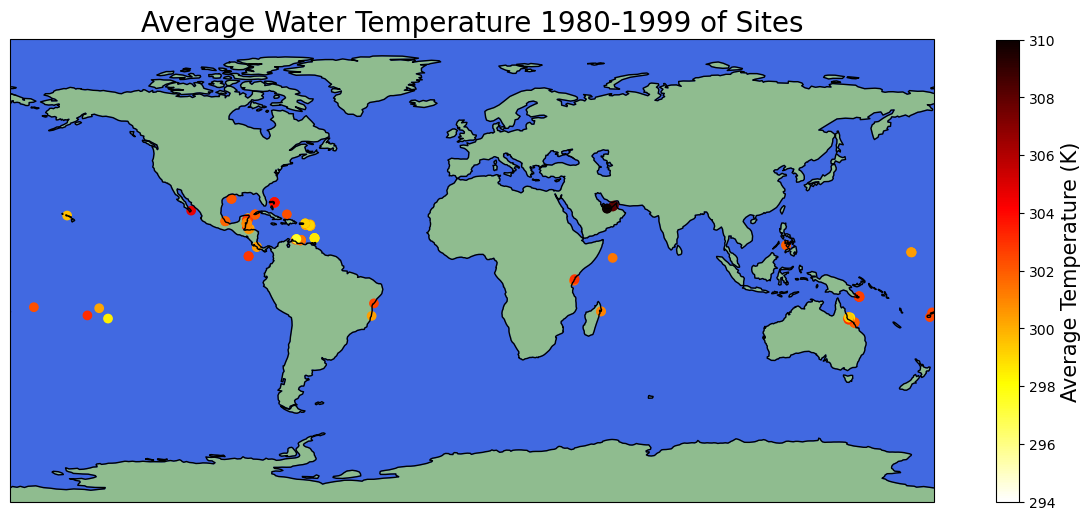

In [4]:
# Temperature(degrees K) average for years 1980-1999

temp1980to1999 = bleaching_df.loc[bleaching_df['Date_Year'] <2000]
# compling data data from the years 1980-1999
tempdata1980 = temp1980to1999[['Latitude_Degrees', 'Longitude_Degrees', 'Temperature_Kelvin', 'Site_Name']]
# making a seperatre varible that has all of data from the varibles listed only from the years 1980-1999
tempdata1980 ['Temperature_Kelvin']=tempdata1980 ['Temperature_Kelvin'].astype(float)
# have to change the data from being strs to floats 
tempaverage1980to1999 = tempdata1980.groupby(['Site_Name']).mean()
# when the site name is the same, I am telling it to take the mean of those temperatures 
tempaverage1980to1999 = tempaverage1980to1999.reset_index()
# resetting the data to original format from the big data set 
templat80 = tempaverage1980to1999['Latitude_Degrees']
templon80 = tempaverage1980to1999['Longitude_Degrees']

Average_temp1980to1999 = plt.figure(figsize=(16, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
plt.title('Average Water Temperature 1980-1999 of Sites', fontsize=20)
ax.coastlines(resolution = '110m', color='black')
#add land feature and color
ax.add_feature(cfeature.LAND, color='darkseagreen')
ax.add_feature(cfeature.OCEAN, color='royalblue')

vmin = 294
vmax = 310
# I am doing this so my colorbars are equal for comparing the two temeperature figures

plt.scatter(templon80, templat80, c=tempaverage1980to1999['Temperature_Kelvin'], transform=ccrs.PlateCarree(), cmap='hot_r', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(label="Average Temperature (K)", orientation="vertical") 
cbar.set_label('Average Temperature (K)',size=15)
# could also use plasma
plt.show()
Average_temp1980to1999.savefig('Average_temp1980to1999.png')

/tmp/ipykernel_82/1634067988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata2000 ['Temperature_Kelvin']=tempdata2000 ['Temperature_Kelvin'].astype(float)


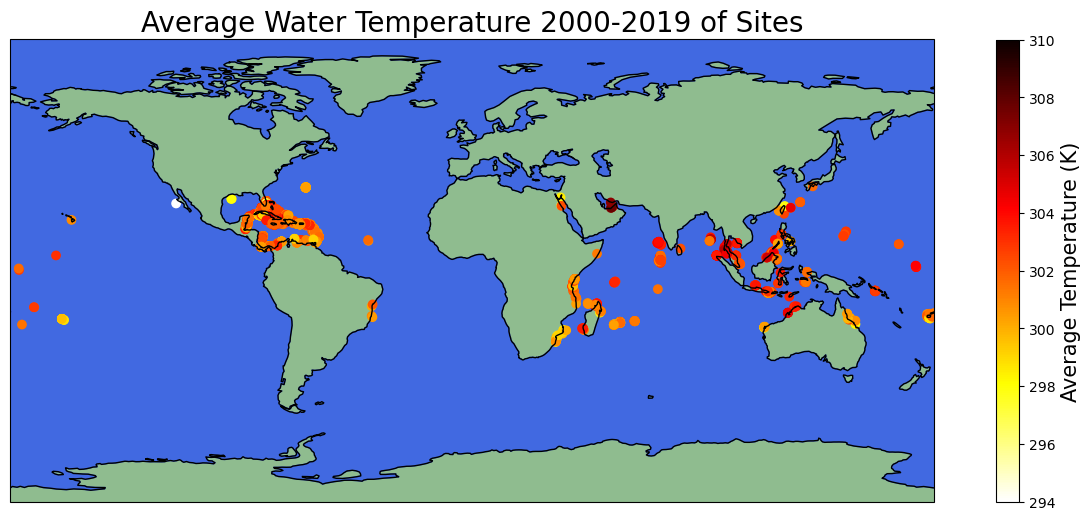

In [5]:
# Temperature(degrees K) average for years 2000-2019

temp2000to2019 = bleaching_df.loc[bleaching_df['Date_Year'] >=2000]
# compling data data from the years 2000-2019
tempdata2000 = temp2000to2019[['Latitude_Degrees', 'Longitude_Degrees', 'Temperature_Kelvin', 'Site_Name']]
# making a seperatre varible that has all of data from the varibles listed only from the years 2000-2019
tempdata2000 ['Temperature_Kelvin']=tempdata2000 ['Temperature_Kelvin'].astype(float)
# have to change the data from being strs to floats 
tempaverage2000to2019 = tempdata2000.groupby(['Site_Name']).mean()
# when the site name is the same, I am telling it to take the mean of those temperatures 
tempaverage2000to2019 = tempaverage2000to2019.reset_index()
# resetting the data to original format from the big data set 
templat = tempaverage2000to2019['Latitude_Degrees']
templon = tempaverage2000to2019['Longitude_Degrees']

Average_temp2000to2019 = plt.figure(figsize=(16, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
plt.title('Average Water Temperature 2000-2019 of Sites', fontsize=20)
ax.coastlines(resolution = '110m', color='black')
#add land feature and color
ax.add_feature(cfeature.LAND, color='darkseagreen')
ax.add_feature(cfeature.OCEAN, color='royalblue')


plt.scatter(templon, templat, c=tempaverage2000to2019['Temperature_Kelvin'], transform=ccrs.PlateCarree(), cmap='hot_r',vmin=vmin, vmax=vmax)
cbar = plt.colorbar(label="Average Temperature (K)", orientation="vertical") 
cbar.set_label('Average Temperature (K)',size=15)
plt.show()
Average_temp2000to2019.savefig('Average_temp2000to2019.png')

In [6]:
# difference in bleaching % (the 1980-1999 data set minus the 2000-2019 data set) based on Ecoregion_Name

# Bleaching percent average for years 1980-1999 grouping via Ecoregion_Name (different than site name)
bleaching_eco1980to1999 = bleaching_df.loc[bleaching_df['Date_Year'] <2000]
# compling data data from the years 1980-1999
data_eco_b1980 = bleaching_eco1980to1999[['Percent_Bleaching', 'Ecoregion_Name']]
# making a seperatre varible that has all of data from the varibles listed only from the years 1980-1999
data_eco_b1980 ['Percent_Bleaching']=data_eco_b1980 ['Percent_Bleaching'].astype(float)
# have to change the data from being strs to floats 
percent_eco1980to1999 = data_eco_b1980.groupby(['Ecoregion_Name']).mean().reset_index()
# when the ecoregion name is the same, I am telling it to take the mean of those samples 
# resetting the data to original format from the big data set 
#display(percent_eco1980to1999)


# Bleaching percent average for years 2000-2019 grouping via Ecoregion_Name (different than site name)
bleaching_eco2000to2019 = bleaching_df.loc[bleaching_df['Date_Year'] >=2000]
# compling data data from the years 2000-2019
data_eco_b2000 = bleaching_eco2000to2019[['Percent_Bleaching', 'Ecoregion_Name']]
# making a seperatre varible that has all of data from the varibles listed only from the years 2000-2019
data_eco_b2000 ['Percent_Bleaching']=data_eco_b2000 ['Percent_Bleaching'].astype(float)
# have to change the data from being strs to floats 
percent_eco2000to2019 = data_eco_b2000.groupby(['Ecoregion_Name']).mean().reset_index()
# when the ecoregion name is the same, I am telling it to take the mean of those samples 
# resetting the data to original format from the big data set 
#display(percent_eco2000to2019)

# need to get the data to match up 

/tmp/ipykernel_82/1566673724.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eco_b1980 ['Percent_Bleaching']=data_eco_b1980 ['Percent_Bleaching'].astype(float)
/tmp/ipykernel_82/1566673724.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eco_b2000 ['Percent_Bleaching']=data_eco_b2000 ['Percent_Bleaching'].astype(float)


In [7]:
percent_eco1980to1999.rename(columns={'Percent_Bleaching':'Percent_Bleaching_old'}, inplace=True)
#display(percent_eco1980to1999)
percent_eco2000to2019.rename(columns={'Percent_Bleaching' : 'Percent_Bleaching_recent'},inplace=True)

merged_data=percent_eco1980to1999.merge(percent_eco2000to2019, on='Ecoregion_Name', how='inner')
merged_data['difference']= merged_data['Percent_Bleaching_recent'] - merged_data['Percent_Bleaching_old']


merged_data = merged_data.dropna()
#display(merged_data)


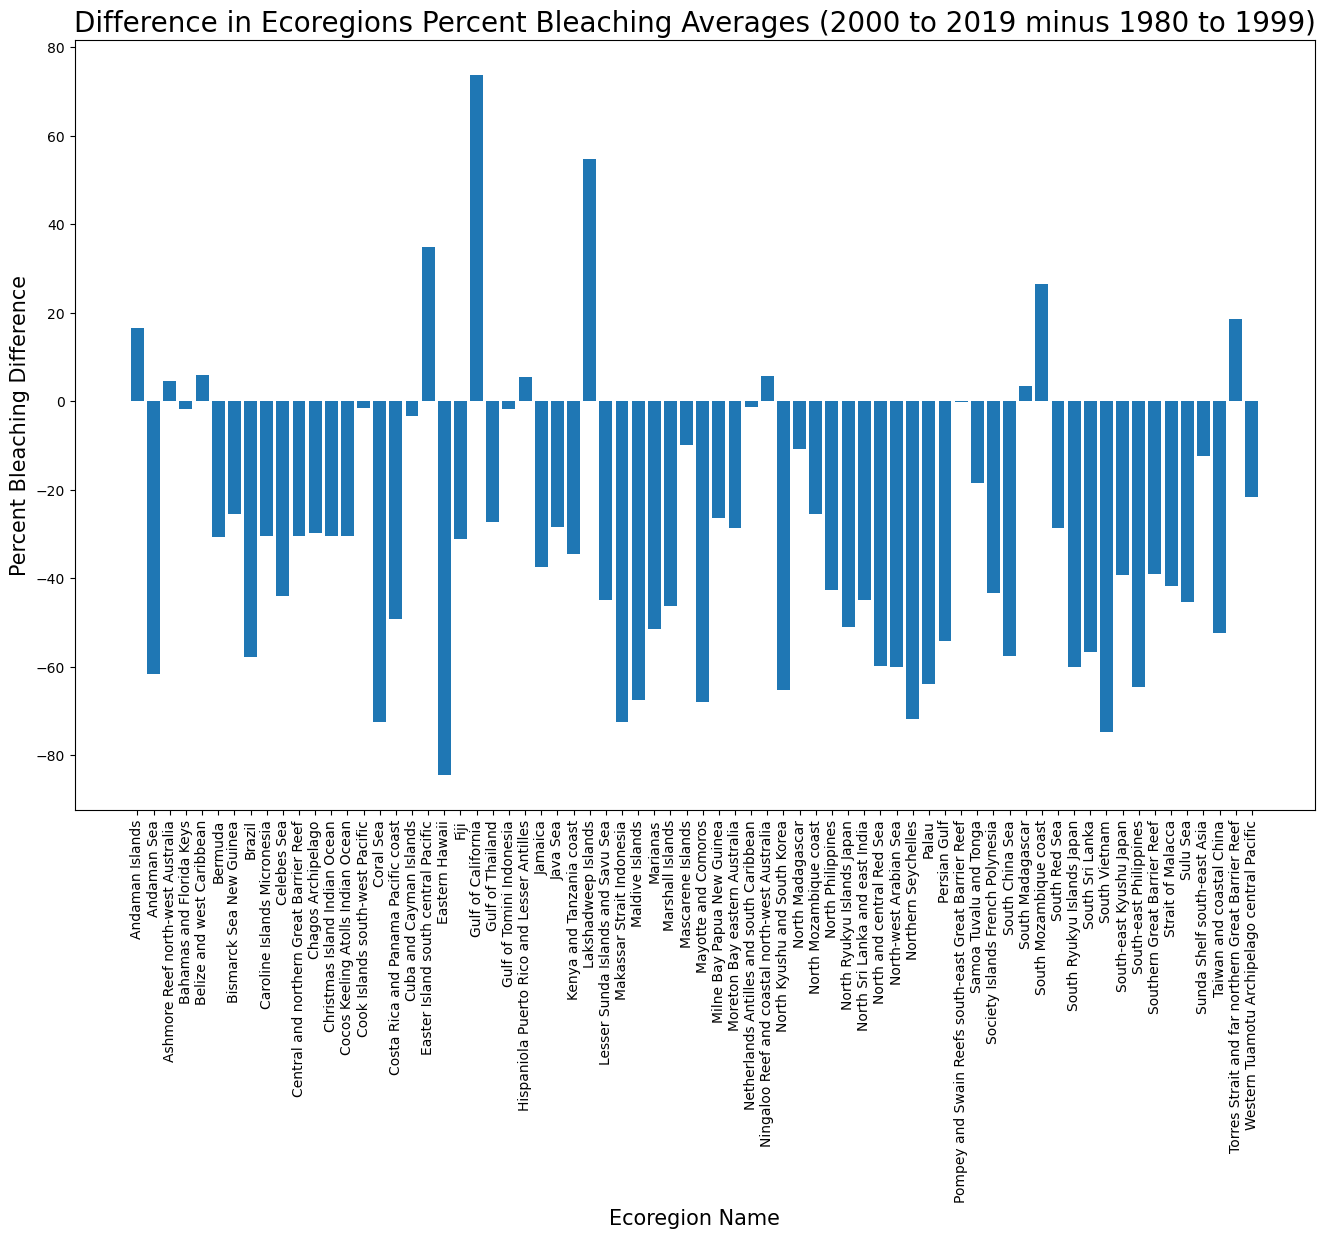

In [13]:
Ecoregion = merged_data['Ecoregion_Name']
difference = merged_data['difference']

difference_scatter = plt.figure(figsize=(16,10))
plt.bar(Ecoregion, difference)
plt.title('Difference in Ecoregions Percent Bleaching Averages (2000 to 2019 minus 1980 to 1999)', fontsize=20)
plt.xlabel('Ecoregion Name', fontsize=15)
plt.ylabel('Percent Bleaching Difference', fontsize=15)
bars_label = merged_data['Ecoregion_Name']
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
#turing ecoregion names vertically so legible 
plt.show()
difference_scatter.savefig('difference_graph.png')

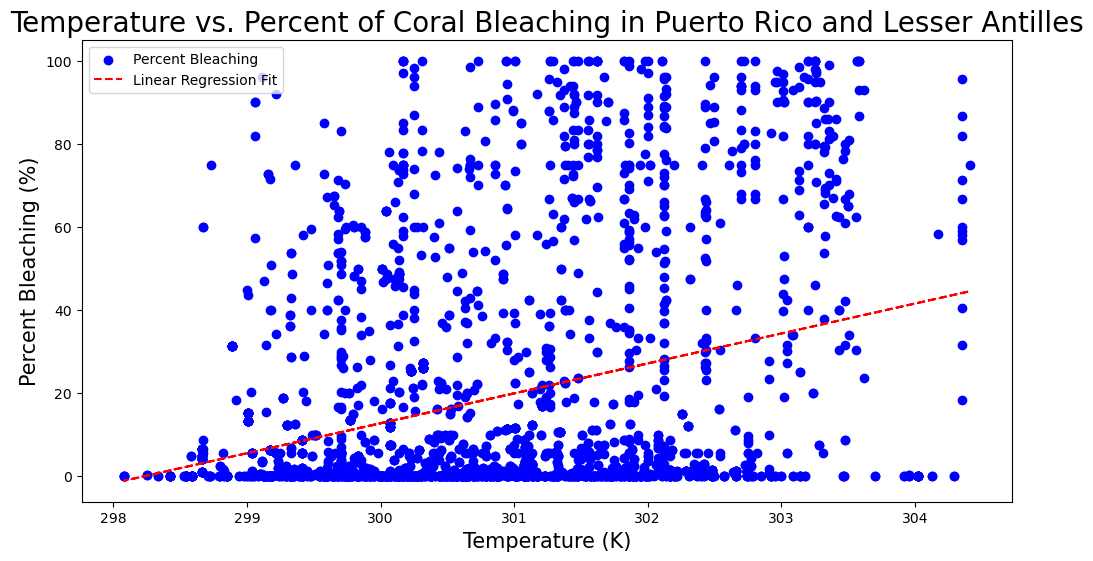

In [10]:
# was intrested in seeing how bleaching changes with temperature changes in Puerto Rico specificly 
bleaching_df_specific=bleaching_df.loc[bleaching_df['Ecoregion_Name']=='Hispaniola Puerto Rico and Lesser Antilles']
percent_temp_specific = bleaching_df_specific[['Percent_Bleaching','Temperature_Kelvin']]
#subsetting my data
percent_temp_specific = percent_temp_specific.dropna()
#making the data frame symetrical 

#for some reason I can't make all of the data at once a float I have to do it everytime I am calling the varible 

#display(percent_temp_specific)

# Calculate linear regression using linregress() 
slope, intercept, rvalue, pvalue, stderr = linregress(percent_temp_specific['Temperature_Kelvin'].astype(float),percent_temp_specific['Percent_Bleaching'].astype(float))


# Store years (index) in x_values
x_values = percent_temp_specific['Temperature_Kelvin'].astype(float)

# Calculate linear regression fit (y = mx + b)
y_values = slope * x_values + intercept


scatter_plot = plt.figure(figsize=(12,6))
plt.ylabel('Percent Bleaching (%)', fontsize=15)
plt.xlabel('Temperature (K)', fontsize=15)
plt.title('Temperature vs. Percent of Coral Bleaching in Puerto Rico and Lesser Antilles', fontsize=20)
plt.scatter(percent_temp_specific['Temperature_Kelvin'].astype(float), percent_temp_specific['Percent_Bleaching'].astype(float), color='b', label='Percent Bleaching')
# Plot the linear regression fit
plt.plot(x_values, y_values, linestyle='--', color='red', label='Linear Regression Fit')
plt.legend()
plt.show()
scatter_plot.savefig('scatterplot.png')